* https://github.com/baidoosik/kaggle-solving/tree/master/Kobe

# 데이터 분석

## 데이터 살펴보기

In [118]:
# import libraries
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

# display all columns
pd.set_option('display.max_columns', None)

In [119]:
data = pd.read_csv('data.csv')

In [120]:
data.head(3)
# max_columns를 설정했기 때문에 많은 column을 다 볼수 있다

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,season,seconds_remaining,shot_distance,shot_made_flag,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
0,Jump Shot,Jump Shot,10,20000012,33.9723,167,72,-118.1028,10,1,0,2000-01,27,18,NaN,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,1
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,0,2000-01,22,15,0.0,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,0,2000-01,45,16,1.0,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3


In [121]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30697 entries, 0 to 30696
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   action_type         30697 non-null  object 
 1   combined_shot_type  30697 non-null  object 
 2   game_event_id       30697 non-null  int64  
 3   game_id             30697 non-null  int64  
 4   lat                 30697 non-null  float64
 5   loc_x               30697 non-null  int64  
 6   loc_y               30697 non-null  int64  
 7   lon                 30697 non-null  float64
 8   minutes_remaining   30697 non-null  int64  
 9   period              30697 non-null  int64  
 10  playoffs            30697 non-null  int64  
 11  season              30697 non-null  object 
 12  seconds_remaining   30697 non-null  int64  
 13  shot_distance       30697 non-null  int64  
 14  shot_made_flag      25697 non-null  float64
 15  shot_type           30697 non-null  object 
 16  shot

In [122]:
# datatype -> category, object
# 데이터타입을 사용하기 좋게 변경시켜준다
data['action_type'] = data['action_type'].astype('object')
data['combined_shot_type'] = data['combined_shot_type'].astype('category')
data['game_event_id'] = data['game_event_id'].astype('category')
data['game_id'] = data['game_id'].astype('category')
data['period'] = data['period'].astype('object')
data['playoffs'] = data['playoffs'].astype('category')
data['season'] = data['season'].astype('category')
data['shot_made_flag'] = data['shot_made_flag'].astype('category')
data['shot_type'] = data['shot_type'].astype('category')
data['team_id'] = data['team_id'].astype('category')

In [123]:
data.set_index('shot_id', inplace = True)
# shot_id로 인덱스를 설정한다

In [124]:
data.head(2)

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,season,seconds_remaining,shot_distance,shot_made_flag,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent
shot_id,,,,,,,,,,,,,,,,,,,,,,,,
1,Jump Shot,Jump Shot,10,20000012,33.9723,167,72,-118.1028,10,1,0,2000-01,27,18,NaN,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR
2,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,0,2000-01,22,15,0.0,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR


In [125]:
data.describe(include=['number'])

,lat,loc_x,loc_y,lon,minutes_remaining,seconds_remaining,shot_distance
count,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000
mean,33.953192,7.110499,91.107535,-118.262690,4.885624,28.365085,13.437437
std,0.087791,110.124578,87.791361,0.110125,3.449897,17.478949,9.374189
min,33.253300,-250.000000,-44.000000,-118.519800,0.000000,0.000000,0.000000
25%,33.884300,-68.000000,4.000000,-118.337800,2.000000,13.000000,5.000000
50%,33.970300,0.000000,74.000000,-118.269800,5.000000,28.000000,15.000000
75%,34.040300,95.000000,160.000000,-118.174800,8.000000,43.000000,21.000000
max,34.088300,248.000000,791.000000,-118.021800,11.000000,59.000000,79.000000


In [126]:
data.describe(include=['category', 'object'])

,action_type,combined_shot_type,game_event_id,game_id,period,playoffs,season,shot_made_flag,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent
count,30697,30697,30697,30697,30697,30697,30697,25697.0,30697,30697,30697,30697,30697,30697,30697,30697,30697
unique,57,6,620,1559,7,2,20,2.0,2,6,7,5,1,1,1559,74,33
top,Jump Shot,Jump Shot,2,21501228,3,0,2005-06,0.0,2PT Field Goal,Center(C),Mid-Range,Less Than 8 ft.,1610612747,Los Angeles Lakers,2016-04-13,LAL @ SAS,SAS
freq,18880,23485,132,50,8296,26198,2318,14232.0,24271,13455,12625,9398,30697,30697,50,1020,1978


## 데이터 분석 및 시각화

In [127]:
train = data.dropna(how='any')
# any 어느 한 컬럼만 비어있어도 지워준다

def bar_chart(feature, ax=None):
    success = train[train['shot_made_flag']==1][feature].value_counts()
    fail = train[train['shot_made_flag']==0][feature].value_counts()
    df = pd.DataFrame([success, fail])
    df.index = ['Success', 'Fail']
    df.plot(kind = 'bar', stacked= True, ax=ax)

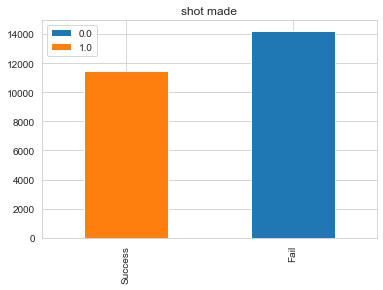

In [128]:
ax = plt.axes()
ax.set_title('shot made')
bar_chart('shot_made_flag',ax)
plt.show()

* 데이터에 큰 차이가 없다면 명시적으로 숫자로 확인하자

In [129]:
print(train['shot_made_flag'].value_counts() / len(train.index))

0.0    0.553839
1.0    0.446161
Name: shot_made_flag, dtype: float64


* (위도, 경도),(x, y) 등 짝지었을 때 의미있는 데이터 Seaborn 라이브러리의 pairplot을 이용한 시각화

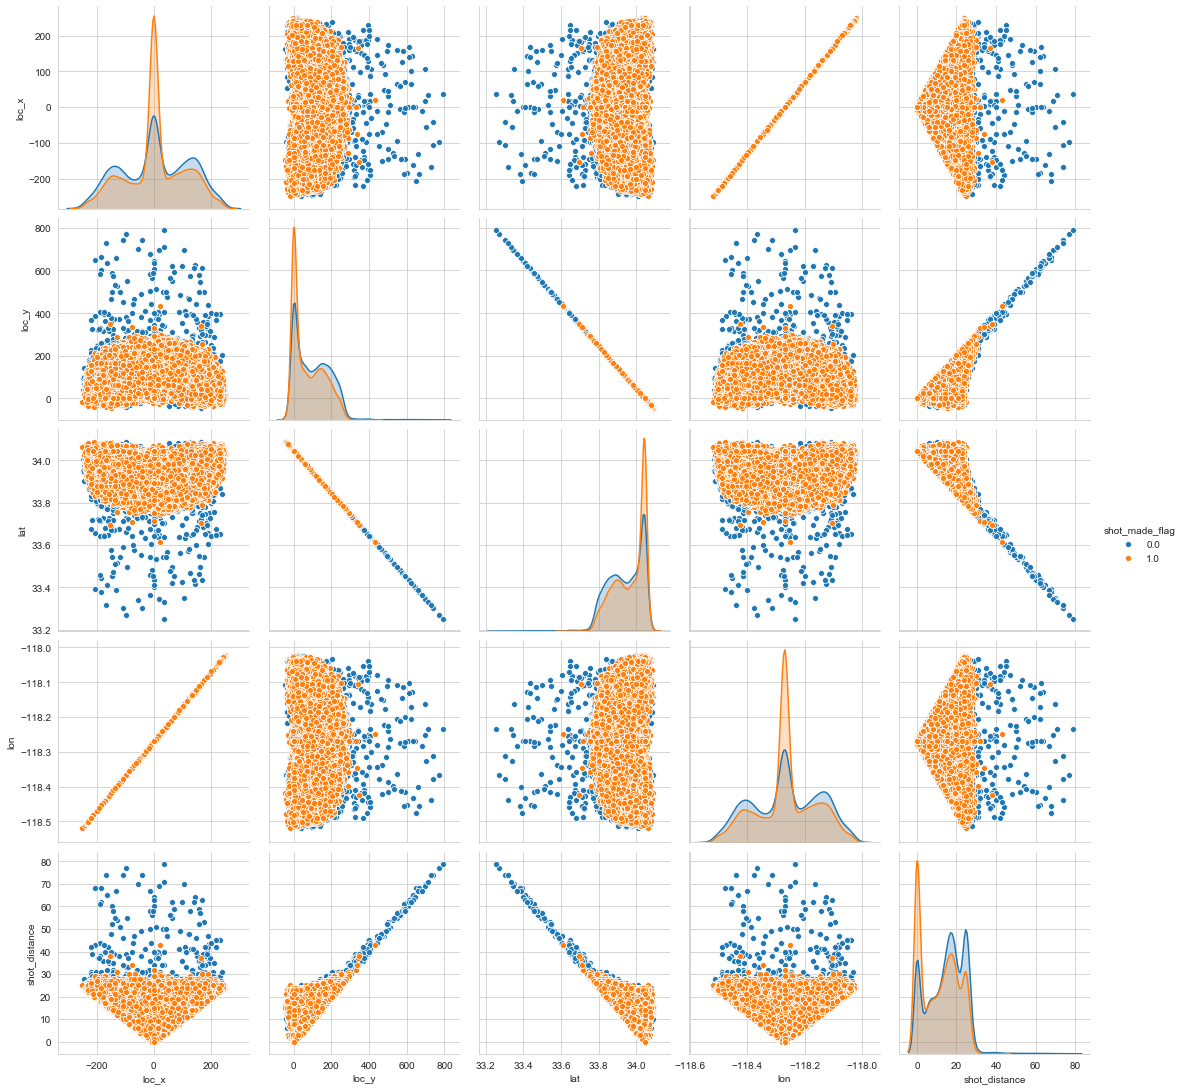

In [130]:
sns.pairplot(train, vars=['loc_x','loc_y','lat','lon','shot_distance'], hue='shot_made_flag', size=3)
plt.show()

* Category 데이터의 항목이 많은 경우 stack방식이 아닌 Seaborn 라이브러리의 countplot() 함수를 이용

In [131]:
def count_plot(column, ax):
    sns.countplot(x=column, hue='shot_made_flag', data=train, ax=ax)

<function matplotlib.pyplot.show(*args, **kw)>

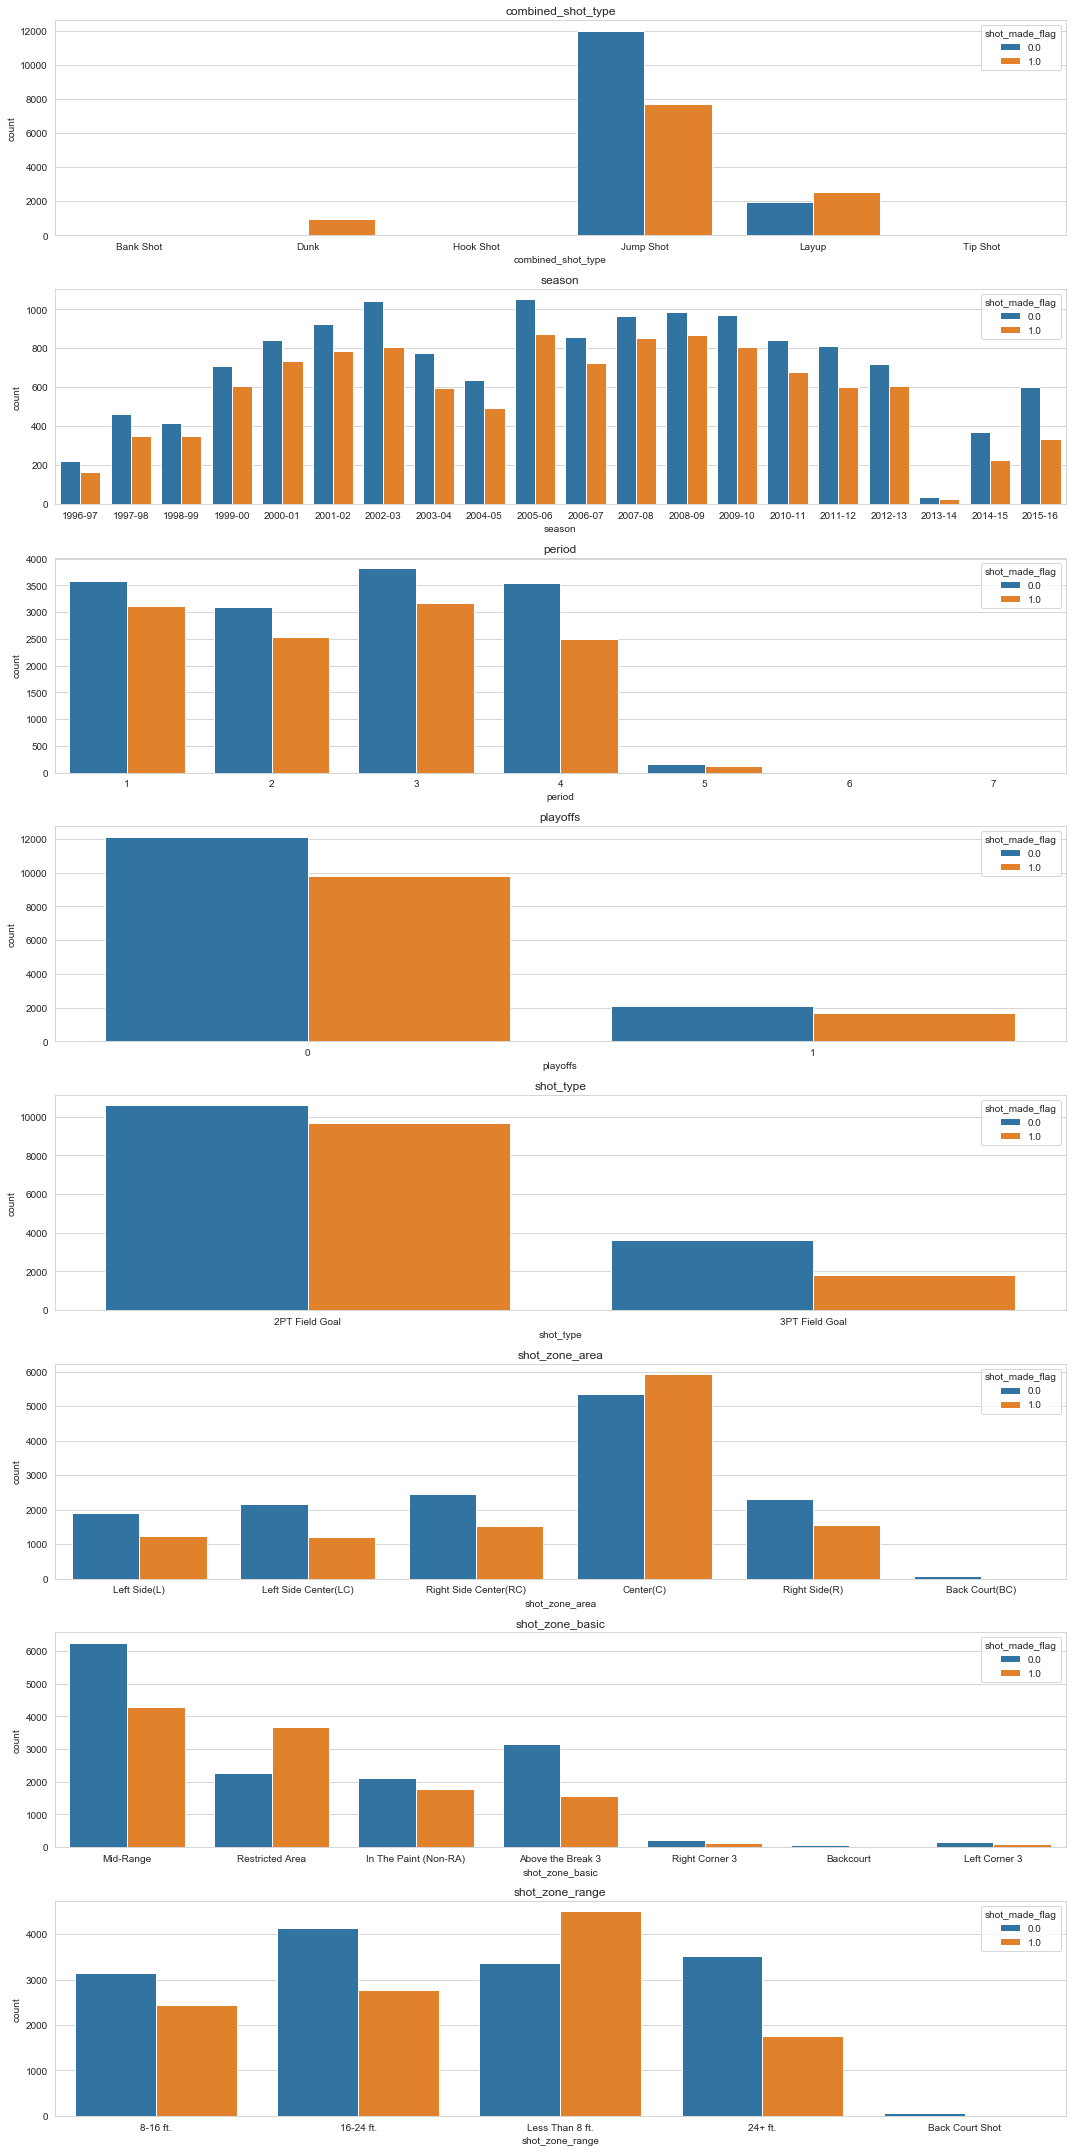

In [132]:
f, axrr = plt.subplots(8, figsize=(15,30))

categorical_data=['combined_shot_type','season','period','playoffs','shot_type','shot_zone_area','shot_zone_basic','shot_zone_range']

for idx, category_data in enumerate(categorical_data,0):
    count_plot(category_data, axrr[idx])
    axrr[idx].set_title(category_data)
    
plt.tight_layout()
plt.show

* 값이 비슷해 보일 때는 명시적으로 숫자로 보자

In [133]:
def print_probability(column):
    print(train[train['shot_made_flag']==1][column].value_counts()/(train[train['shot_made_flag']==1][column].value_counts()+train[train['shot_made_flag']==0][column].value_counts()))

In [134]:
for categoty_data in categorical_data:
    print(print_probability(categoty_data))

Bank Shot    0.791667
Dunk         0.928030
Hook Shot    0.535433
Jump Shot    0.391071
Layup        0.565093
Tip Shot     0.348684
Name: combined_shot_type, dtype: float64
None
1996-97    0.422977
1997-98    0.430864
1998-99    0.458824
1999-00    0.460366
2000-01    0.466667
2001-02    0.458431
2002-03    0.436285
2003-04    0.433260
2004-05    0.436557
2005-06    0.453742
2006-07    0.457885
2007-08    0.468389
2008-09    0.467855
2009-10    0.453725
2010-11    0.446417
2011-12    0.425847
2012-13    0.457831
2013-14    0.406780
2014-15    0.376054
2015-16    0.356223
Name: season, dtype: float64
None
1    0.465672
2    0.448802
3    0.453442
4    0.413702
5    0.442857
6    0.466667
7    0.428571
Name: period, dtype: float64
None
0    0.446420
1    0.444651
Name: playoffs, dtype: float64
None
2PT Field Goal    0.477348
3PT Field Goal    0.329268
Name: shot_type, dtype: float64
None
Back Court(BC)           0.013889
Center(C)                0.525556
Left Side Center(LC)     0.361177

* continuous 한 데이터들 시각화 facet_grid를 이용

In [135]:
def draw_facetgrid(feature):
    facet = sns.FacetGrid(train, hue='shot_made_flag',aspect=5)
    facet.map(sns.kdeplot, feature, shade=True)
    facet.set(xlim=(0, train[feature].max()))
    # survived 라벨을 표시.
    facet.add_legend()
    plt.show()

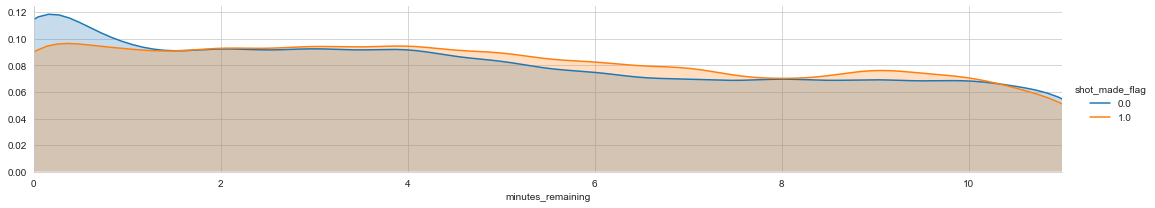

In [136]:
draw_facetgrid('minutes_remaining')

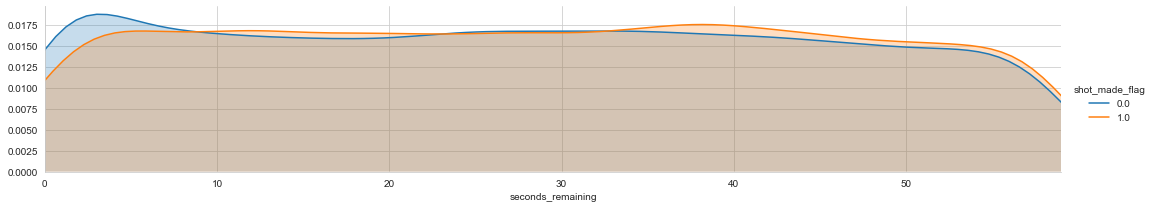

In [137]:
draw_facetgrid('seconds_remaining')

* group_by 함수를 이용해 두개 column을 합쳐서 분석하기

In [138]:
train['shot_made_flag'] = train['shot_made_flag'].astype('int64')

In [139]:
train.groupby(['season','combined_shot_type'])['shot_made_flag'].sum()/(train.groupby(['season','combined_shot_type'])['shot_made_flag'].count())

season   combined_shot_type
1996-97  Bank Shot                  NaN
         Dunk                  0.947368
         Hook Shot                  NaN
         Jump Shot             0.380567
         Layup                 0.450450
                                 ...   
2015-16  Dunk                  1.000000
         Hook Shot             0.272727
         Jump Shot             0.327711
         Layup                 0.623529
         Tip Shot                   NaN
Name: shot_made_flag, Length: 120, dtype: float64

# Feature Engineering

## Data cleaning
* Featureing 단계에서 필요없는 데이터들을 삭제 작업을 시작하기 전에 정리

In [140]:
data_cp = data.copy()
target = data_cp['shot_made_flag'].copy()

# 코비는 하나의 팀에서만 활동했기때문에 team_id, team_name이 의미없다
data_cp.drop('team_id', axis=1, inplace=True)
data_cp.drop('team_name', axis=1, inplace=True)

# lat, lon -> loc_x, loc_y 로 대치가능
data_cp.drop('lat', axis=1, inplace=True)
data_cp.drop('lon', axis=1, inplace=True)

# game_id, game_event_id are independent
data_cp.drop('game_id', axis=1, inplace=True)
data_cp.drop('game_event_id', axis=1, inplace=True)

data_cp.drop('shot_made_flag', axis=1, inplace= True)

In [141]:
data_cp.head(2)

,action_type,combined_shot_type,loc_x,loc_y,minutes_remaining,period,playoffs,season,seconds_remaining,shot_distance,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,game_date,matchup,opponent
shot_id,,,,,,,,,,,,,,,,,
1,Jump Shot,Jump Shot,167,72,10,1,0,2000-01,27,18,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,2000-10-31,LAL @ POR,POR
2,Jump Shot,Jump Shot,-157,0,10,1,0,2000-01,22,15,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,2000-10-31,LAL @ POR,POR


## Data Transformation
* 의미 있는 데이터 즉 feature로 변형
* 시각화를 통해 5초 이하의 시간이 남았을 때 특설을 찾음

In [142]:
# 시간 그래프를 보면 시간이 적게 남았을 때 안들어갈 확률이 높음
data_cp['seconds_from_period_end'] = 60 * data_cp['minutes_remaining'] + data_cp['seconds_remaining']

data_cp['last_5_sec_in_period'] = data_cp['seconds_from_period_end']<5

# 사용한 시간 컬럼을 지워준다
data_cp.drop('minutes_remaining', axis=1, inplace=True)
data_cp.drop('seconds_remaining', axis=1, inplace=True)
data_cp.drop('seconds_from_period_end', axis=1, inplace=True)

## home, away mapping
data_cp['home_away'] = data_cp['matchup'].str.contains('vs').astype('int')
data_cp.drop('matchup', axis=1, inplace=True)

In [143]:
data_cp.head(1)

,action_type,combined_shot_type,loc_x,loc_y,period,playoffs,season,shot_distance,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,game_date,opponent,last_5_sec_in_period,home_away
shot_id,,,,,,,,,,,,,,,,
1,Jump Shot,Jump Shot,167,72,1,0,2000-01,18,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,2000-10-31,POR,False,0


In [144]:
# game data 년/월/일

data_cp['game_date'] = pd.to_datetime(data_cp['game_date'])

In [145]:
data_cp['game_year'] = data_cp['game_date'].dt.year
data_cp['game_month'] = data_cp['game_date'].dt.month

data_cp.drop('game_date', axis = 1, inplace=True)

In [146]:
data_cp.head(2)

,action_type,combined_shot_type,loc_x,loc_y,period,playoffs,season,shot_distance,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,opponent,last_5_sec_in_period,home_away,game_year,game_month
shot_id,,,,,,,,,,,,,,,,,
1,Jump Shot,Jump Shot,167,72,1,0,2000-01,18,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,POR,False,0,2000,10
2,Jump Shot,Jump Shot,-157,0,1,0,2000-01,15,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,POR,False,0,2000,10


In [147]:
# loc_x, loc_y binding 25 단위로

data_cp['loc_x'] = pd.cut(data_cp['loc_x'],25)
data_cp['loc_y'] = pd.cut(data_cp['loc_y'],25)

In [148]:
# 1~2개의 데이터는 의미가 없다
# 인덱싱
data_cp.action_type.value_counts()

Jump Shot                             18880
Layup Shot                             2567
Driving Layup Shot                     1978
Turnaround Jump Shot                   1057
Fadeaway Jump Shot                     1048
Running Jump Shot                       926
Pullup Jump shot                        476
Turnaround Fadeaway shot                439
Slam Dunk Shot                          411
Reverse Layup Shot                      395
Jump Bank Shot                          333
Driving Dunk Shot                       310
Dunk Shot                               262
Tip Shot                                182
Alley Oop Dunk Shot                     122
Step Back Jump shot                     118
Floating Jump shot                      114
Driving Reverse Layup Shot               97
Hook Shot                                84
Driving Finger Roll Shot                 82
Alley Oop Layup shot                     80
Reverse Dunk Shot                        75
Running Layup Shot              

In [149]:
rare_action_types = data_cp['action_type'].value_counts().sort_values().index.values[:20]
rare_action_types

array(['Turnaround Fadeaway Bank Jump Shot', 'Running Slam Dunk Shot',
       'Driving Floating Bank Jump Shot',
       'Cutting Finger Roll Layup Shot', 'Running Tip Shot',
       'Putback Slam Dunk Shot', 'Tip Layup Shot',
       'Turnaround Finger Roll Shot', 'Running Pull-Up Jump Shot',
       'Running Finger Roll Shot', 'Putback Dunk Shot',
       'Driving Floating Jump Shot', 'Driving Bank shot',
       'Hook Bank Shot', 'Cutting Layup Shot',
       'Running Finger Roll Layup Shot', 'Running Reverse Layup Shot',
       'Pullup Bank shot', 'Turnaround Hook Shot', 'Driving Hook Shot'],
      dtype=object)

In [150]:
data_cp.loc[data_cp['action_type'].isin(rare_action_types), 'action_type'] = 'Other'

In [151]:
data_cp.head(2)

,action_type,combined_shot_type,loc_x,loc_y,period,playoffs,season,shot_distance,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,opponent,last_5_sec_in_period,home_away,game_year,game_month
shot_id,,,,,,,,,,,,,,,,,
1,Jump Shot,Jump Shot,"(148.4, 168.32]","(56.2, 89.6]",1,0,2000-01,18,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,POR,False,0,2000,10
2,Jump Shot,Jump Shot,"(-170.32, -150.4]","(-10.6, 22.8]",1,0,2000-01,15,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,POR,False,0,2000,10


In [152]:
categorial_cols = {'action_type', 'combined_shot_type','period', 'season','shot_type','shot_zone_area', 'shot_zone_basic','shot_zone_range','game_year','game_month','opponent','loc_x','loc_y'}

In [153]:
pd.get_dummies?

Signature:
pd.get_dummies(
    data,
    prefix=None,
    prefix_sep='_',
    dummy_na=False,
    columns=None,
    sparse=False,
    drop_first=False,
    dtype=None,
) -> 'DataFrame'
Docstring:
Convert categorical variable into dummy/indicator variables.

Parameters
----------
data : array-like, Series, or DataFrame
    Data of which to get dummy indicators.
prefix : str, list of str, or dict of str, default None
    String to append DataFrame column names.
    Pass a list with length equal to the number of columns
    when calling get_dummies on a DataFrame. Alternatively, `prefix`
    can be a dictionary mapping column names to prefixes.
prefix_sep : str, default '_'
    If appending prefix, separator/delimiter to use. Or pass a
    list or dictionary as with `prefix`.
dummy_na : bool, default False
    Add a column to indicate NaNs, if False NaNs are ignored.
columns : list-like, default None
    Column names in the DataFrame to be encoded.
    If `columns` is None then all the co

In [154]:
data_cp.join?

Signature:
data_cp.join(
    other,
    on=None,
    how='left',
    lsuffix='',
    rsuffix='',
    sort=False,
) -> 'DataFrame'
Docstring:
Join columns of another DataFrame.

Join columns with `other` DataFrame either on index or on a key
column. Efficiently join multiple DataFrame objects by index at once by
passing a list.

Parameters
----------
other : DataFrame, Series, or list of DataFrame
    Index should be similar to one of the columns in this one. If a
    Series is passed, its name attribute must be set, and that will be
    used as the column name in the resulting joined DataFrame.
on : str, list of str, or array-like, optional
    Column or index level name(s) in the caller to join on the index
    in `other`, otherwise joins index-on-index. If multiple
    values given, the `other` DataFrame must have a MultiIndex. Can
    pass an array as the join key if it is not already contained in
    the calling DataFrame. Like an Excel VLOOKUP operation.
how : {'left', 'right', 'o

In [155]:
for column in categorial_cols:
    # cataegorical variable 을 dummy변수로 바꾸어준다
    dummies = pd.get_dummies(data_cp[column])
    dummies = dummies.add_prefix("{}#".format(column))
    data_cp.drop(column, axis=1, inplace=True)
    # join 은 두 데이터 프레임을 합친다
    data_cp = data_cp.join(dummies)

In [156]:
data_cp

,playoffs,shot_distance,last_5_sec_in_period,home_away,shot_zone_basic#Above the Break 3,shot_zone_basic#Backcourt,shot_zone_basic#In The Paint (Non-RA),shot_zone_basic#Left Corner 3,shot_zone_basic#Mid-Range,shot_zone_basic#Restricted Area,shot_zone_basic#Right Corner 3,season#1996-97,season#1997-98,season#1998-99,season#1999-00,season#2000-01,season#2001-02,season#2002-03,season#2003-04,season#2004-05,season#2005-06,season#2006-07,season#2007-08,season#2008-09,season#2009-10,season#2010-11,season#2011-12,season#2012-13,season#2013-14,season#2014-15,season#2015-16,shot_zone_area#Back Court(BC),shot_zone_area#Center(C),shot_zone_area#Left Side Center(LC),shot_zone_area#Left Side(L),shot_zone_area#Right Side Center(RC),shot_zone_area#Right Side(R),game_year#1996,game_year#1997,game_year#1998,game_year#1999,game_year#2000,game_year#2001,game_year#2002,game_year#2003,game_year#2004,game_year#2005,game_year#2006,game_year#2007,game_year#2008,game_year#2009,game_year#2010,game_year#2011,game_year#2012,game_year#2013,game_year#2014,game_year#2015,game_year#2016,shot_type#2PT Field Goal,shot_type#3PT Field Goal,game_month#1,game_month#2,game_month#3,game_month#4,game_month#5,game_month#6,game_month#10,game_month#11,game_month#12,"loc_x#(-250.498, -230.08]","loc_x#(-230.08, -210.16]","loc_x#(-210.16, -190.24]","loc_x#(-190.24, -170.32]","loc_x#(-170.32, -150.4]","loc_x#(-150.4, -130.48]","loc_x#(-130.48, -110.56]","loc_x#(-110.56, -90.64]","loc_x#(-90.64, -70.72]","loc_x#(-70.72, -50.8]","loc_x#(-50.8, -30.88]","loc_x#(-30.88, -10.96]","loc_x#(-10.96, 8.96]","loc_x#(8.96, 28.88]","loc_x#(28.88, 48.8]","loc_x#(48.8, 68.72]","loc_x#(68.72, 88.64]","loc_x#(88.64, 108.56]","loc_x#(108.56, 128.48]","loc_x#(128.48, 148.4]","loc_x#(148.4, 168.32]","loc_x#(168.32, 188.24]","loc_x#(188.24, 208.16]","loc_x#(208.16, 228.08]","loc_x#(228.08, 248.0]",combined_shot_type#Bank Shot,combined_shot_type#Dunk,combined_shot_type#Hook Shot,combined_shot_type#Jump Shot,combined_shot_type#Layup,combined_shot_type#Tip Shot,"loc_y#(-44.835, -10.6]","loc_y#(-10.6, 22.8]","loc_y#(22.8, 56.2]","loc_y#(56.2, 89.6]","loc_y#(89.6, 123.0]","loc_y#(123.0, 156.4]","loc_y#(156.4, 189.8]","loc_y#(189.8, 223.2]","loc_y#(223.2, 256.6]","loc_y#(256.6, 290.0]","loc_y#(290.0, 323.4]","loc_y#(323.4, 356.8]","loc_y#(356.8, 390.2]","loc_y#(390.2, 423.6]","loc_y#(423.6, 457.0]","loc_y#(457.0, 490.4]","loc_y#(490.4, 523.8]","loc_y#(523.8, 557.2]","loc_y#(557.2, 590.6]","loc_y#(590.6, 624.0]","loc_y#(624.0, 657.4]","loc_y#(657.4, 690.8]","loc_y#(690.8, 724.2]","loc_y#(724.2, 757.6]","loc_y#(757.6, 791.0]",period#1,period#2,period#3,period#4,period#5,period#6,period#7,opponent#ATL,opponent#BKN,opponent#BOS,opponent#CHA,opponent#CHI,opponent#CLE,opponent#DAL,opponent#DEN,opponent#DET,opponent#GSW,opponent#HOU,opponent#IND,opponent#LAC,opponent#MEM,opponent#MIA,opponent#MIL,opponent#MIN,opponent#NJN,opponent#NOH,opponent#NOP,opponent#NYK,opponent#OKC,opponent#ORL,opponent#PHI,opponent#PHX,opponent#POR,opponent#SAC,opponent#SAS,opponent#SEA,opponent#TOR,opponent#UTA,opponent#VAN,opponent#WAS,action_type#Alley Oop Dunk Shot,action_type#Alley Oop Layup shot,action_type#Driving Dunk Shot,action_type#Driving Finger Roll Layup Shot,action_type#Driving Finger Roll Shot,action_type#Driving Jump shot,action_type#Driving Layup Shot,action_type#Driving Reverse Layup Shot,action_type#Driving Slam Dunk Shot,action_type#Dunk Shot,action_type#Fadeaway Bank shot,action_type#Fadeaway Jump Shot,action_type#Finger Roll Layup Shot,action_type#Finger Roll Shot,action_type#Floating Jump shot,action_type#Follow Up Dunk Shot,action_type#Hook Shot,action_type#Jump Bank Shot,action_type#Jump Hook Shot,action_type#Jump Shot,action_type#Layup Shot,action_type#Other,action_type#Pullup Jump shot,action_type#Putback Layup Shot,action_type#Reverse Dunk Shot,action_type#Reverse Layup Shot,action_type#Reverse Slam Dunk Shot,action_type#Running Bank shot,action_type#Running Dunk Shot,action_type#Running Hook Shot,actio

# 중요 컬럼을 뽑아내기

In [157]:
unknown_mask = data['shot_made_flag'].isnull()

In [158]:
data_cp.head(1)

,playoffs,shot_distance,last_5_sec_in_period,home_away,shot_zone_basic#Above the Break 3,shot_zone_basic#Backcourt,shot_zone_basic#In The Paint (Non-RA),shot_zone_basic#Left Corner 3,shot_zone_basic#Mid-Range,shot_zone_basic#Restricted Area,shot_zone_basic#Right Corner 3,season#1996-97,season#1997-98,season#1998-99,season#1999-00,season#2000-01,season#2001-02,season#2002-03,season#2003-04,season#2004-05,season#2005-06,season#2006-07,season#2007-08,season#2008-09,season#2009-10,season#2010-11,season#2011-12,season#2012-13,season#2013-14,season#2014-15,season#2015-16,shot_zone_area#Back Court(BC),shot_zone_area#Center(C),shot_zone_area#Left Side Center(LC),shot_zone_area#Left Side(L),shot_zone_area#Right Side Center(RC),shot_zone_area#Right Side(R),game_year#1996,game_year#1997,game_year#1998,game_year#1999,game_year#2000,game_year#2001,game_year#2002,game_year#2003,game_year#2004,game_year#2005,game_year#2006,game_year#2007,game_year#2008,game_year#2009,game_year#2010,game_year#2011,game_year#2012,game_year#2013,game_year#2014,game_year#2015,game_year#2016,shot_type#2PT Field Goal,shot_type#3PT Field Goal,game_month#1,game_month#2,game_month#3,game_month#4,game_month#5,game_month#6,game_month#10,game_month#11,game_month#12,"loc_x#(-250.498, -230.08]","loc_x#(-230.08, -210.16]","loc_x#(-210.16, -190.24]","loc_x#(-190.24, -170.32]","loc_x#(-170.32, -150.4]","loc_x#(-150.4, -130.48]","loc_x#(-130.48, -110.56]","loc_x#(-110.56, -90.64]","loc_x#(-90.64, -70.72]","loc_x#(-70.72, -50.8]","loc_x#(-50.8, -30.88]","loc_x#(-30.88, -10.96]","loc_x#(-10.96, 8.96]","loc_x#(8.96, 28.88]","loc_x#(28.88, 48.8]","loc_x#(48.8, 68.72]","loc_x#(68.72, 88.64]","loc_x#(88.64, 108.56]","loc_x#(108.56, 128.48]","loc_x#(128.48, 148.4]","loc_x#(148.4, 168.32]","loc_x#(168.32, 188.24]","loc_x#(188.24, 208.16]","loc_x#(208.16, 228.08]","loc_x#(228.08, 248.0]",combined_shot_type#Bank Shot,combined_shot_type#Dunk,combined_shot_type#Hook Shot,combined_shot_type#Jump Shot,combined_shot_type#Layup,combined_shot_type#Tip Shot,"loc_y#(-44.835, -10.6]","loc_y#(-10.6, 22.8]","loc_y#(22.8, 56.2]","loc_y#(56.2, 89.6]","loc_y#(89.6, 123.0]","loc_y#(123.0, 156.4]","loc_y#(156.4, 189.8]","loc_y#(189.8, 223.2]","loc_y#(223.2, 256.6]","loc_y#(256.6, 290.0]","loc_y#(290.0, 323.4]","loc_y#(323.4, 356.8]","loc_y#(356.8, 390.2]","loc_y#(390.2, 423.6]","loc_y#(423.6, 457.0]","loc_y#(457.0, 490.4]","loc_y#(490.4, 523.8]","loc_y#(523.8, 557.2]","loc_y#(557.2, 590.6]","loc_y#(590.6, 624.0]","loc_y#(624.0, 657.4]","loc_y#(657.4, 690.8]","loc_y#(690.8, 724.2]","loc_y#(724.2, 757.6]","loc_y#(757.6, 791.0]",period#1,period#2,period#3,period#4,period#5,period#6,period#7,opponent#ATL,opponent#BKN,opponent#BOS,opponent#CHA,opponent#CHI,opponent#CLE,opponent#DAL,opponent#DEN,opponent#DET,opponent#GSW,opponent#HOU,opponent#IND,opponent#LAC,opponent#MEM,opponent#MIA,opponent#MIL,opponent#MIN,opponent#NJN,opponent#NOH,opponent#NOP,opponent#NYK,opponent#OKC,opponent#ORL,opponent#PHI,opponent#PHX,opponent#POR,opponent#SAC,opponent#SAS,opponent#SEA,opponent#TOR,opponent#UTA,opponent#VAN,opponent#WAS,action_type#Alley Oop Dunk Shot,action_type#Alley Oop Layup shot,action_type#Driving Dunk Shot,action_type#Driving Finger Roll Layup Shot,action_type#Driving Finger Roll Shot,action_type#Driving Jump shot,action_type#Driving Layup Shot,action_type#Driving Reverse Layup Shot,action_type#Driving Slam Dunk Shot,action_type#Dunk Shot,action_type#Fadeaway Bank shot,action_type#Fadeaway Jump Shot,action_type#Finger Roll Layup Shot,action_type#Finger Roll Shot,action_type#Floating Jump shot,action_type#Follow Up Dunk Shot,action_type#Hook Shot,action_type#Jump Bank Shot,action_type#Jump Hook Shot,action_type#Jump Shot,action_type#Layup Shot,action_type#Other,action_type#Pullup Jump shot,action_type#Putback Layup Shot,action_type#Reverse Dunk Shot,action_type#Reverse Layup Shot,action_type#Reverse Slam Dunk Shot,action_type#Running Bank shot,action_type#Running Dunk Shot,action_type#Running Hook Shot,actio

In [159]:
# 제출할 때 사용할 데이터 분리 (즉, 예측해야 하는 데이터)
data_submit = data_cp[unknown_mask]

In [160]:
Y = target[-unknown_mask]

In [161]:
X = data_cp

In [162]:
from sklearn.decomposition import PCA, KernelPCA
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import VarianceThreshold, RFE, SelectKBest, chi2
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier,VotingClassifier, RandomForestClassifier, AdaBoostClassifier

## 분산을 이용

In [163]:
# 분산이 낮은 feature들을 제거해주자
threshold = 0.90
vt = VarianceThreshold().fit(X)

# Find feature names
feature_var_threshold = data_cp.columns[vt.variances_>threshold*(1-threshold)]
feature_var_threshold

Index(['playoffs', 'shot_distance', 'home_away',
       'shot_zone_basic#Above the Break 3',
       'shot_zone_basic#In The Paint (Non-RA)', 'shot_zone_basic#Mid-Range',
       'shot_zone_basic#Restricted Area', 'shot_zone_area#Center(C)',
       'shot_zone_area#Left Side Center(LC)', 'shot_zone_area#Left Side(L)',
       'shot_zone_area#Right Side Center(RC)', 'shot_zone_area#Right Side(R)',
       'shot_type#2PT Field Goal', 'shot_type#3PT Field Goal', 'game_month#1',
       'game_month#2', 'game_month#3', 'game_month#4', 'game_month#11',
       'game_month#12', 'loc_x#(-10.96, 8.96]', 'combined_shot_type#Jump Shot',
       'combined_shot_type#Layup', 'loc_y#(-10.6, 22.8]', 'loc_y#(22.8, 56.2]',
       'loc_y#(123.0, 156.4]', 'period#1', 'period#2', 'period#3', 'period#4',
       'action_type#Jump Shot', 'shot_zone_range#16-24 ft.',
       'shot_zone_range#24+ ft.', 'shot_zone_range#8-16 ft.',
       'shot_zone_range#Less Than 8 ft.'],
      dtype='object')

## RandomForestClassifier 사용

In [164]:
X =X[-unknown_mask]

model = RandomForestClassifier()

model.fit(X,Y)

feature_imp = pd.DataFrame(model.feature_importances_, index=X.columns, columns=['importance'])
feature_imp = feature_imp.sort_values("importance", ascending= False).head(20).index
feature_imp

Index(['shot_distance', 'action_type#Jump Shot', 'home_away', 'period#3',
       'period#1', 'period#2', 'period#4', 'action_type#Layup Shot',
       'game_month#3', 'game_month#1', 'game_month#4', 'game_month#12',
       'game_month#2', 'combined_shot_type#Dunk', 'game_month#11', 'playoffs',
       'loc_x#(-10.96, 8.96]', 'action_type#Driving Layup Shot',
       'opponent#SAS', 'combined_shot_type#Jump Shot'],
      dtype='object')

In [165]:
np.hstack?

Signature: np.hstack(tup)
Docstring:
Stack arrays in sequence horizontally (column wise).

This is equivalent to concatenation along the second axis, except for 1-D
arrays where it concatenates along the first axis. Rebuilds arrays divided
by `hsplit`.

This function makes most sense for arrays with up to 3 dimensions. For
instance, for pixel-data with a height (first axis), width (second axis),
and r/g/b channels (third axis). The functions `concatenate`, `stack` and
`block` provide more general stacking and concatenation operations.

Parameters
----------
tup : sequence of ndarrays
    The arrays must have the same shape along all but the second axis,
    except 1-D arrays which can be any length.

Returns
-------
stacked : ndarray
    The array formed by stacking the given arrays.

See Also
--------
stack : Join a sequence of arrays along a new axis.
vstack : Stack arrays in sequence vertically (row wise).
dstack : Stack arrays in sequence depth wise (along third axis).
concatenate 

In [166]:
# 위에서 구한 feature_var_threshold와 feature_imp를 조합하여 중요한 feature를 가져온다

features = np.hstack([feature_var_threshold,feature_imp])

features = np.unique(features)
print('final feature')

for f in features:
    print('\t-{}'.format(f))

final feature
	-action_type#Driving Layup Shot
	-action_type#Jump Shot
	-action_type#Layup Shot
	-combined_shot_type#Dunk
	-combined_shot_type#Jump Shot
	-combined_shot_type#Layup
	-game_month#1
	-game_month#11
	-game_month#12
	-game_month#2
	-game_month#3
	-game_month#4
	-home_away
	-loc_x#(-10.96, 8.96]
	-loc_y#(-10.6, 22.8]
	-loc_y#(123.0, 156.4]
	-loc_y#(22.8, 56.2]
	-opponent#SAS
	-period#1
	-period#2
	-period#3
	-period#4
	-playoffs
	-shot_distance
	-shot_type#2PT Field Goal
	-shot_type#3PT Field Goal
	-shot_zone_area#Center(C)
	-shot_zone_area#Left Side Center(LC)
	-shot_zone_area#Left Side(L)
	-shot_zone_area#Right Side Center(RC)
	-shot_zone_area#Right Side(R)
	-shot_zone_basic#Above the Break 3
	-shot_zone_basic#In The Paint (Non-RA)
	-shot_zone_basic#Mid-Range
	-shot_zone_basic#Restricted Area
	-shot_zone_range#16-24 ft.
	-shot_zone_range#24+ ft.
	-shot_zone_range#8-16 ft.
	-shot_zone_range#Less Than 8 ft.


In [167]:
data_cp = data_cp.loc[:, features]
data_submit = data_submit.loc[:, features]
X = X.loc[:, features]

print('Clean dataset shape: {}'.format(data_cp.shape))
print('Subbmitable dataset shape:{}'.format(data_submit.shape))
print('Train features shape:{}'.format(X.shape))
print('Target label shape:{}'.format(Y.shape))

Clean dataset shape: (30697, 39)
Subbmitable dataset shape:(5000, 39)
Train features shape:(25697, 39)
Target label shape:(25697,)


## PCA 방법

In [168]:
components = 8
pca = PCA(n_components=components).fit(X)

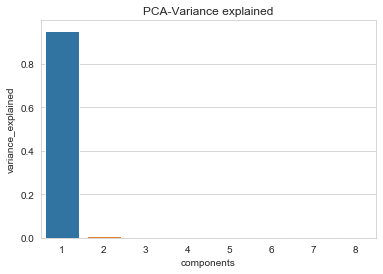

In [169]:
pca_variance_explained_df = pd.DataFrame({
    "components" : np.arange(1, components + 1),
    "variance_explained" : pca.explained_variance_ratio_
})

ax = sns.barplot(x= 'components', y = 'variance_explained', data=pca_variance_explained_df)
ax.set_title("PCA-Variance explained")
plt.show()

# 모델링 및 평가하기

In [170]:
X.head(3)

,action_type#Driving Layup Shot,action_type#Jump Shot,action_type#Layup Shot,combined_shot_type#Dunk,combined_shot_type#Jump Shot,combined_shot_type#Layup,game_month#1,game_month#11,game_month#12,game_month#2,game_month#3,game_month#4,home_away,"loc_x#(-10.96, 8.96]","loc_y#(-10.6, 22.8]","loc_y#(123.0, 156.4]","loc_y#(22.8, 56.2]",opponent#SAS,period#1,period#2,period#3,period#4,playoffs,shot_distance,shot_type#2PT Field Goal,shot_type#3PT Field Goal,shot_zone_area#Center(C),shot_zone_area#Left Side Center(LC),shot_zone_area#Left Side(L),shot_zone_area#Right Side Center(RC),shot_zone_area#Right Side(R),shot_zone_basic#Above the Break 3,shot_zone_basic#In The Paint (Non-RA),shot_zone_basic#Mid-Range,shot_zone_basic#Restricted Area,shot_zone_range#16-24 ft.,shot_zone_range#24+ ft.,shot_zone_range#8-16 ft.,shot_zone_range#Less Than 8 ft.
shot_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,15,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0
3,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,16,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0
4,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,22,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0


In [171]:
X.shape

(25697, 39)

In [172]:
Y.head(3)

shot_id
2    0.0
3    1.0
4    0.0
Name: shot_made_flag, dtype: category
Categories (2, float64): [0.0, 1.0]

In [173]:
Y.shape

(25697,)

In [228]:
## 각 알고리즘 및 함수의 configuration

seed=7
processors=1
num_folds=5
num_instance=len(X)
scoring='neg_log_loss'

k_fold = KFold(n_splits=num_folds, random_state = seed)

In [229]:

models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
# knn은 근처에 몇개를 볼건지 알려줘야한다
models.append(('kNN',KNeighborsClassifier(n_neighbors=5)))
models.append(('CART',DecisionTreeClassifier()))

results = []
names = []

for name, model in models:
    cv_results = cross_val_score(model, X, Y, cv=k_fold, scoring = scoring, n_jobs=processors)
    results.append(cv_results)
    names.append(name)
    
    print('{}: {} +/- {}'.format(name, cv_results.mean(), cv_results.std()))

LR: -0.6188193218725694 +/- 0.004363985247902272
LDA: -0.6200222598834624 +/- 0.005268337905436931
kNN: -2.0409667268360083 +/- 0.1992975377549342
CART: -9.54050070397854 +/- 0.760930167111565


In [213]:
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

# Ensemble(앙상블) 모형
* 다양한 모형의 예측 결과를 결합하여 사용하는 모형(여러 알고리즘을 결합하여 사용)
* 각각의 알고리즘은 상호 독립적이어야 하고, 오류 분류율은 적어도 50% 이상

## Bagging
* bootstrap Aggregation
    * 통계적 분류와 회귀 분석에서 사용되는 기계학습 알고리즘의 안정성과 정확도를 향상시키기 위한 앙상블 학습법의 알고리즘
    * 분산을 줄이고, overfitting을 피하도록 해준다.
    * 주로, Decision Tree와 RandomForest에 적용
    
### Decision Tree

In [236]:
cart = DecisionTreeClassifier()
num_trees = 100

model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=seed)

results = cross_val_score(model, X, Y, cv=k_fold, scoring = scoring, n_jobs=processors)

In [237]:
print('{} +/- {}'.format(results.mean(), results.std()))

-0.9178356241773005 +/- 0.02955286001580283


### RandomForest
* Bagging 종류 알고리즘 중 하나로 성능이 좋은 편

In [238]:
num_trees = 100
num_features = 10

model = RandomForestClassifier(n_estimators=num_trees, max_features=num_features)

results = cross_val_score(model, X, Y, cv=k_fold, scoring = scoring, n_jobs=processors)

In [239]:
print('{} +/- {}'.format(results.mean(), results.std()))

-0.9050138346040715 +/- 0.036967097078068625


## Voting

In [243]:
estimators = []
# 여러 모델을 학습시키고 조합

estimators.append(('lr', LogisticRegression()))
estimators.append(('LDA',LinearDiscriminantAnalysis()))

ensemble = VotingClassifier(estimators, voting='soft', weights=[6,4])
results = cross_val_score(ensemble, X, Y, scoring=scoring, n_jobs=processors)

In [244]:
print('{} +/- {}'.format(results.mean(), results.std()))

-0.6195021443080785 +/- 0.007836031395028803


In [245]:
model = ensemble

In [263]:
import datetime
model.fit(X, Y)
preds = model.predict_proba(data_submit)

submission = pd.DataFrame()
submission['shot_id'] = data_submit.index
submission['shot_made_flag'] = preds[:,0]

submission.to_csv('sub_now.csv', index=False)

# 점수 높여보기

In [274]:
# 평가함수를 미리 만들어 본다
test_data = train[['loc_x', 'loc_y','shot_made_flag']]

test_data = test_data.dropna()

def test_it(data):
    clf = RandomForestClassifier(n_jobs=-1)
    return cross_val_score(clf, data.drop('shot_made_flag',1),data.shot_made_flag, scoring = 'neg_log_loss', cv = 10)

In [275]:
test_it(test_data).mean()

-0.8847544750995745

In [276]:
data = train[['loc_y','shot_made_flag']]
data = data.dropna()

test_it(data).mean()
# feature끼리 조합이 좋아야 학습이 잘된다

-0.6905886020233778

In [277]:
data = train[['shot_distance','shot_made_flag']]
data = data.dropna()

test_it(data).mean()

-0.6713330908479926

In [278]:
data = train[['shot_distance','loc_y','shot_made_flag']]
data = data.dropna()

test_it(data).mean()

-0.984015188449691

In [280]:
data = train[['seconds_remaining','shot_distance','shot_made_flag']]
data = data.dropna()

test_it(data).mean()

-0.8162567982043301

In [282]:
print(train.season.unique())

[2000-01, 2001-02, 2002-03, 2003-04, 2004-05, ..., 2015-16, 1996-97, 1997-98, 1998-99, 1999-00]
Length: 20
Categories (20, object): [2000-01, 2001-02, 2002-03, 2003-04, ..., 1996-97, 1997-98, 1998-99, 1999-00]


In [283]:
train['season_start_year'] = train.season.str.split('-').str[0]
train['seacon_start_year'] = train['season_start_year'].astype(int)

In [284]:
data = train[['seacon_start_year','shot_distance','shot_made_flag']]
data = data.dropna()

test_it(data).mean()

-1.2204021155277265

In [286]:
action_map = {action: i for i , action in enumerate(train.action_type.unique())}
train['action_type_enumerated'] = train.action_type.map(action_map)
train['action_type_enumerated']

shot_id
2        0
3        0
4        0
5        1
6        0
        ..
30692    6
30693    0
30695    3
30696    0
30697    0
Name: action_type_enumerated, Length: 25697, dtype: int64

In [287]:
data = train[['action_type_enumerated','shot_distance','shot_made_flag']]
data = data.dropna()

test_it(data).mean()

-0.6497893336065241

In [291]:
data = train[['action_type_enumerated','shot_distance','shot_made_flag']].dropna()

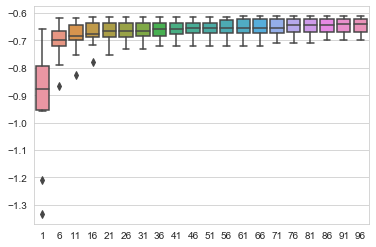

In [294]:
estimators, scores = list(range(1,100,5)), []

for i in estimators:
    clf = RandomForestClassifier(n_jobs=-1, n_estimators=i, random_state=2016)
    x = cross_val_score(clf, data.drop(['shot_made_flag'],1), data.shot_made_flag, scoring='neg_log_loss', cv = 10)
    scores.append(x)
    
x = [i for i in estimators for j in range(10)]
sns.boxplot(x, np.array(scores).flatten())

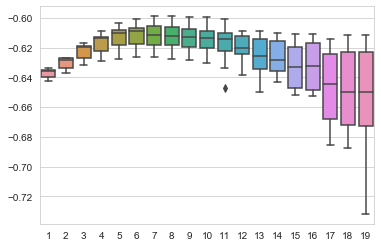

In [293]:
depth, scores = list(range(1,20,1)), []

for i in depth:
    clf = RandomForestClassifier(n_jobs=-1, n_estimators=70,max_depth=i, random_state=2016)
    x = cross_val_score(clf, data.drop(['shot_made_flag'],1), data.shot_made_flag, scoring='neg_log_loss', cv = 10)
    scores.append(x)
    
x = [i for i in depth for j in range(10)]
sns.boxplot(x, np.array(scores).flatten())

In [ ]:
clf = RandomForestClassifier(n_jobs=-1, n_estimators=70, max_depth=7, random_state=2016) # a more powerful classifier

train_data = train.loc[~train.shot_made_flag.isnull(), ['action_type_enumerated',
                                             'shot_distance', 'shot_made_flag', 'away']]
test = train.loc[train.shot_made_flag.isnull(), ['action_type_enumerated',
                                           'shot_distance', 'shot_id', 'away']]
# Impute
mode = test.action_type_enumerated.mode()[0]
test.action_type_enumerated.fillna(mode, inplace=True)

# Train and predict
clf.fit(train_data.drop('shot_made_flag', 1), train_data.shot_made_flag)
predictions = clf.predict_proba(test.drop('shot_id', 1))

In [ ]:

import datetime
submission = pd.DataFrame({'shot_id': test.shot_id,
                           'shot_made_flag': predictions[:, 1]})
submission[['shot_id', 'shot_made_flag']].to_csv('submission{}.csv'.format(datetime.datetime.now()), index=False)